In [2]:
import plback as pl, numpy as np, matplotlib.pyplot as plt
from scipy import integrate
from mpmath import quadgl

In [3]:
params = pl.defaultParams
plane = pl.Plane(-5e-3,5e-3,1000,-5e-3,5e-3,1000)
c = pl.Plane(-3e-3,3e-3,1000,-3e-3,3e-3,1000)
d=pl.Plane(-1e-3,1e-3,40001,-1e-3,1e-3,3)

print(plane)



xmin=-0.005,xmax=0.005,xpoints=1000,x step size = 1e-05
ymin=-0.005,ymax=0.005,ypoints=1000,y step size = 1e-05


In [3]:
# spot centers for initial beam and translated beam
# Re[a10]/a00 = delta s/wo , w0 = 1e-3

#tilt angle
alpha = 1e-6

m0 = pl.modes((0,0,1))
m1 = pl.modes((1,0,1))
m2 = pl.modes((2,2,1))

f0 =pl.calculate(params,plane,m0,0)
f1 =pl.calculate(params,plane,m1,0)
f2 = pl.calculate(params,plane,m2,0)


top_hat_amp = [[0 for m in range(1000)] for n in range(1000)]

for x in range(1000):
    for y in range(1000):
        a = plane.getX()[x]
        b = plane.getY()[y]
        if np.sqrt(a**2+b**2)<=0.0025:
            top_hat_amp[x][y]=800
        else:   
            top_hat_amp[x][y]=0

C:\Users\edwar\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


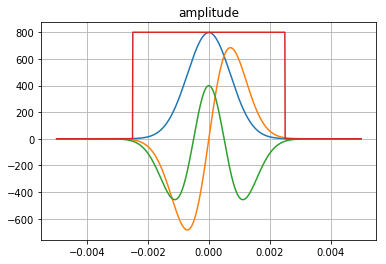

In [4]:
plt.plot(plane.getX(), f0[500][:]) 
plt.plot(plane.getX(), f1[500][:]) 
plt.plot(plane.getX(), f2[500][:]) 
plt.plot(plane.getX(), top_hat_amp[500][:])
plt.title('amplitude')
plt.grid() 

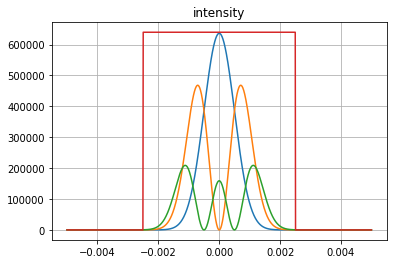

In [5]:
plt.plot(plane.getY(),f0[:][500]**2)
plt.plot(plane.getX(), f1[:][500]**2) 
plt.plot(plane.getX(), f2[:][500]**2)
plt.plot(plane.getX(), np.array(top_hat_amp[:][500])**2)

plt.title('intensity')
plt.grid()

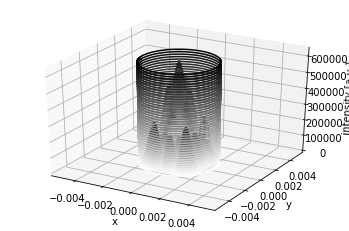

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(plane.getX(), plane.getY(), np.array(top_hat_amp)**2, 50, cmap='binary')
ax.contour3D(plane.getX(), plane.getY(), abs(f0)**2, 50, cmap='binary')
ax.contour3D(plane.getX(), plane.getY(), abs(f1)**2, 50, cmap='binary')
ax.contour3D(plane.getX(), plane.getY(), abs(f2)**2, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('intensity [a.u.]');

In [6]:
#product = np.conjugate(f0)*(f1)


#f = lambda y, x: (pl.amplitude(params,x,y,0,m0))
#integrate.dblquad(f, plane.xmin, plane.xmax, lambda x: plane.ymin, lambda x: plane.ymax)

In [7]:
f = lambda y, x: (pl.amplitude(params,x,y,0,m0))*np.conjugate((pl.amplitude(params,x,y,0,m0)))
#quad (function, [xmin,xmax],[ymin,ymax])
quadgl(f, [plane.xmin,plane.xmax],[plane.ymin,plane.ymax])

mpc(real='1.0', imag='0.0')

In [8]:
m0 = pl.modes((0,0,1))
m2 = pl.modes((2,2,1))

f = lambda y, x: (pl.amplitude(params,x,y,0,m1))*np.conjugate((pl.amplitude(params,x,y,0,m1)))

#quad (function, [xmin,xmax],[ymin,ymax])
quadgl(f, [plane.xmin,plane.xmax],[plane.ymin,plane.ymax])

mpc(real='0.99999999999999989', imag='0.0')

In [9]:
m0 = pl.modes((0,0,1))
m1 = pl.modes((1,1,1))

f = lambda y, x: (pl.amplitude(params,x,y,0,m1))*np.conjugate((pl.amplitude(params,x,y,0,m1)))

#quad (function, [xmin,xmax],[ymin,ymax])
quadgl(f, [plane.xmin,plane.xmax],[plane.ymin,plane.ymax])

mpc(real='1.0000000000000002', imag='0.0')

In [10]:
f = lambda y, x: (pl.amplitude(params,x,y,0,m0))*np.conjugate((pl.amplitude(params,x,y,0,m1)))

#quad (function, [xmin,xmax],[ymin,ymax])
quadgl(f, [plane.xmin,plane.xmax],[plane.ymin,plane.ymax])

mpc(real='0.0', imag='0.0')

In [11]:
f = lambda y, x: (pl.amplitude(params,x,y,0,m1))*np.conjugate((pl.amplitude(params,x,y,0,m0)))

#quad (function, [0,1],[0,1])
quadgl(f, [plane.xmin,plane.xmax],[plane.ymin,plane.ymax])

mpc(real='0.0', imag='0.0')

In [51]:
def tophat(x,y):
    if np.sqrt(x**2+y**2)<=0.0025:
        return 800
    else:   
        return 0

m00 = pl.modes((0,0,1))
m10 = pl.modes((1,0,1))
m01 = pl.modes((0,1,1))
m11 = pl.modes((1,1,1))
m20 = pl.modes((2,0,1))
m21 = pl.modes((2,1,1))
m22 = pl.modes((2,2,1))
m02 = pl.modes((0,2,1))
m12 = pl.modes((1,2,1))
    
f00 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m00)))

f10 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m10)))
f01 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m01)))
f11 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m11)))

f12 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m12)))

f20 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m20)))
f02 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m02)))
f21 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m21)))
f22 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m22)))


q00=quadgl(f00, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q10=quadgl(f10, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q11=quadgl(f10, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q01=quadgl(f01, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q20=quadgl(f20, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q02=quadgl(f02, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q12=quadgl(f12, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q21=quadgl(f21, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q22=quadgl(f22, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])


In [52]:
print(q00,q10,q01,q11,q20,q02,q12,q21,q22)

(2.00155341359403 + 0.0j) (0.0 + 0.0j) (0.0 + 0.0j) (0.0 + 0.0j) (1.38204730396285 + 0.0j) (1.38195305596771 + 0.0j) (0.0 + 0.0j) (0.0 + 0.0j) (0.854575410693307 + 0.0j)


In [56]:
from IPython.display import HTML, display
import tabulate
table = [["mode",'0,0','1,0','0,1','1,1','2,0','0,2','2,1','1,2','2,2'],
         ["Cnm",2.0015,0,0,0,1.3820,1.3819,0,0,.85457]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

mode,"0,0","1,0","0,1","1,1","2,0","0,2","2,1","1,2","2,2"
Cnm,2.0015,0,0,0,1.382,1.3819,0,0,0.85457


In [57]:

fa = lambda y, x: tophat(x,y)*np.conjugate((tophat(x,y)))

qa=quadgl(fa, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])

In [58]:
print(qa)

12.7377929075283


In [8]:
def tophat(x,y):
    if np.sqrt(x**2+y**2)<=0.0025:
        return 800
    else:   
        return 0

m40 = pl.modes((4,0,1))
m04 = pl.modes((0,4,1))
m42 = pl.modes((4,2,1))
m24 = pl.modes((2,4,1))
m44 = pl.modes((4,4,1))



f40 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m40)))
f04 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m04)))
f42 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m42)))
f24 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m24)))
f44 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m44)))


q40=quadgl(f40, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q04=quadgl(f04, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q42=quadgl(f42, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q24=quadgl(f24, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q44=quadgl(f44, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])

In [9]:
print(q40,q04,q42,q24,q44)

(1.04398477522161 + 0.0j) (1.04346863382407 + 0.0j) (0.441357397884271 + 0.0j) (0.441764306083936 + 0.0j) (0.00204838623998591 + 0.0j)


In [10]:
from IPython.display import HTML, display
import tabulate
table = [["mode",'0,0','2,0','0,2','2,2','4,0','0,4','4,2','2,4','4,4','6,0','6,2','6,4','6,6'],
         ["Cnm",2.0015,1.3820,1.3819,.85457,1.0439,1.0439,0.44135,0.44176,0.002,0.562,.002,-.1756,-.01906]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

mode,"0,0","2,0","0,2","2,2","4,0","0,4","4,2","2,4","4,4","6,0","6,2"
Cnm,2.0015,1.382,1.3819,0.85457,1.0439,1.0439,0.44135,0.44176,0.002,0.562,0.002


In [4]:
combined_modes = pl.modes((0,0,2.0015),(2,0,1.382),(0,2,1.382),(2,2,.85457),(4,0,1.044),(0,4,1.044),(2,4,.44),(4,2,.4),(4,4,.002),(6,0,.562),(6,2,.002),(6,4,-.1756),(6,6,-.01906))

In [5]:
combined_amps = pl.calculate(params,plane,combined_modes,0)

C:\Users\edwar\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


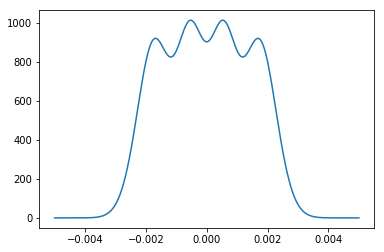

In [6]:
plt.plot(plane.getY(),combined_amps[:][500])

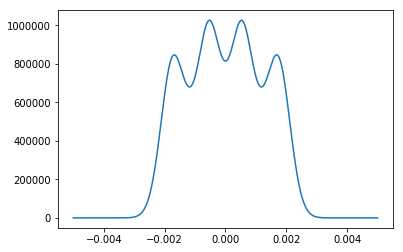

In [7]:
plt.plot(plane.getY(),abs(combined_amps[:][500]**2))

In [7]:
def tophat(x,y):
    if np.sqrt(x**2+y**2)<=0.0025:
        return 800
    else:   
        return 0


m60 = pl.modes((6,0,1))
m62 = pl.modes((6,2,1))
m64 = pl.modes((6,4,1))
m66 = pl.modes((6,6,1))



f60 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m60)))
f62 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m62)))
f64 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m64)))
f66 = lambda y, x: tophat(x,y)*np.conjugate((pl.amplitude(params,x,y,0,m66)))


q60=quadgl(f60, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q62=quadgl(f62, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q64=quadgl(f64, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])
q66=quadgl(f66, [plane.xmin/2,plane.xmax/2],[plane.ymin/2,plane.ymax/2])


In [8]:
print(q60,q62,q64,q66)

(0.562829696397363 + 0.0j) (0.00199521597501979 + 0.0j) (-0.175653367867061 + 0.0j) (-0.0190613345310188 + 0.0j)
